In [1]:
### load needed libraries
#if(!require(limma)) install.packages("limma")
#if(!require(RColorBrewer)) install.packages("RColorBrewer")
#if(!require("maptools")) install.packages("maptools")
#if(!require("scatterplot3d")) install.packages("scatterplot3d")

library("Matrix")
library("irlba")
library("limma")

library("RColorBrewer")
library("maptools")
library("scatterplot3d")

library("minfi")

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Please note that 'maptools' will be retired during October 2023,
plan transition at your earliest convenience (see
https://r-spatial.org/r/2023/05/15/evolution4.html and earlier blogs
for guidance);some functionality will be moved to 'sp'.
 Checking rgeos availability: FALSE

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, va

In [2]:
### import necessary variables
project_master_dir = "/stg3/data2/resource3/project/RA-TIP-CS"

# input
analysis_object_fp = paste0(project_master_dir, "/Data/Processed_Data", "/02.gmSet_snpQCfiltered_All_dasen.RDS") # Female only, All Chrom, yes SNP QC filtering
donor_metadata_fp = paste0(project_master_dir, "/Data/Metadata/TIP-CS_metadata_HIPAAcomp.csv") 


# output directories
version_dir = "/YesSNPqc_Female_Allchrom"

mds_output_dir = paste0(project_master_dir, "/Analysis", version_dir, "/MDS")
dir.create(file.path(mds_output_dir), showWarnings = FALSE)


[1] "/stg3/data2/resource3/project/RA-TIP-CS/Analysis/YesSNPqc_Female_Allchrom/MDS"


In [3]:
### Perform MDS Analysis based on all post-QC loci and using only female samples
# define matrix
mSet_analysis_obj = readRDS(analysis_object_fp)
beta_analysis_df = getBeta(mSet_analysis_obj)
M_analysis_df = getM(mSet_analysis_obj)

dim(M_analysis_df)

[1] 789935    381

In [4]:
# remove rows with NAs
keepIndex = apply(M_analysis_df,1,function(x){!any(is.na(x))})
M_analysis_df = M_analysis_df[keepIndex,]

In [5]:
### MDS analysis 
# run MDS analysis
dist_obj = dist(t(M_analysis_df))
fit_obj = cmdscale(dist_obj, eig=TRUE, k=3)

a = fit_obj$points[,1]
b = fit_obj$points[,2]
c = fit_obj$points[,3]

xname = "Dimension 1"
yname = "Dimension 2"
zname = "Dimension 3"

# define color universe
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

# create labels
id = colnames(M_analysis_df)
idSplit = strsplit(id, split = "_", fixed = T)

lab_id = sapply(idSplit, `[`, 2)
patient_id = sapply(idSplit, `[`, 1)

cell_type = as.vector(unlist(lapply(idSplit, function(x) x[length(x) -1])))
RA_status = as.vector(unlist(lapply(idSplit, function(x) x[length(x)])))

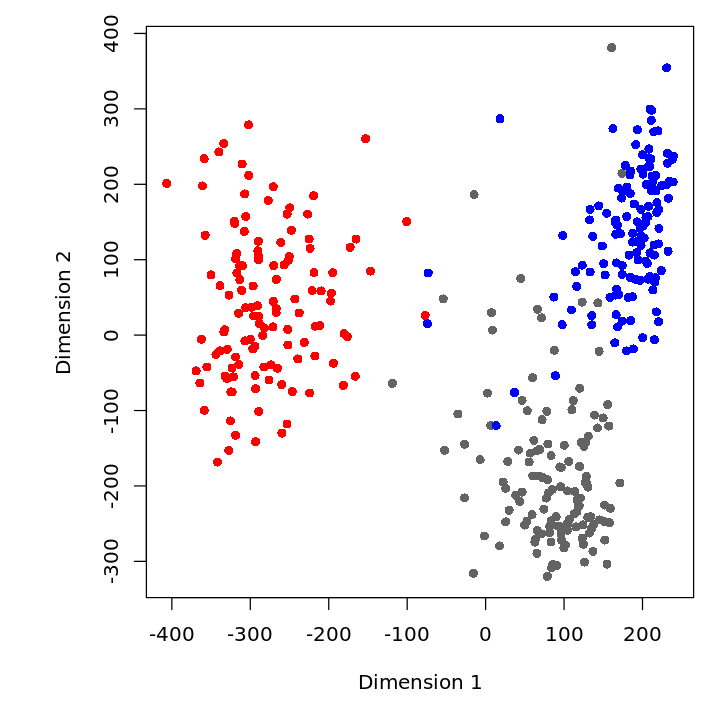

png 
  2

png 
  2

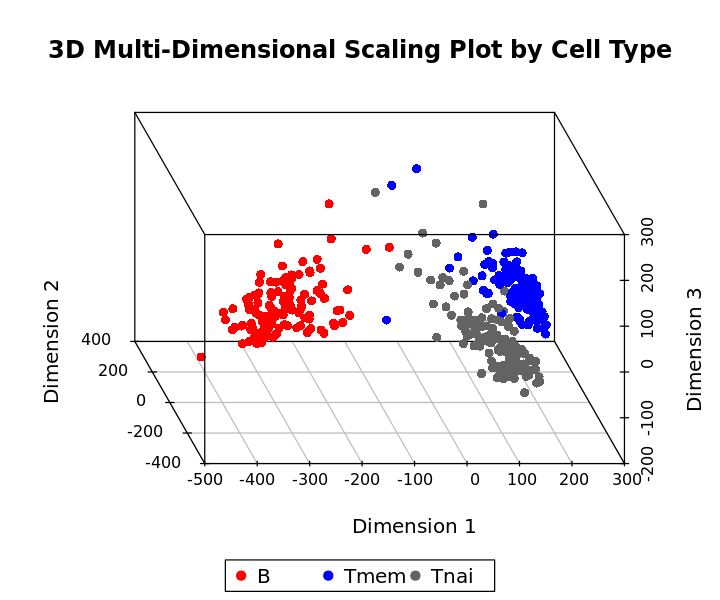

In [6]:
# Plot chart
plotColor_driver = cell_type

plotColors = c("red", "blue", "grey39")
names(plotColors) = levels(factor(plotColor_driver))
colors = unname(plotColors[plotColor_driver])

shapes = rep(19, length(plotColor_driver))

dd = as.character(id)
names(colors) = unique(dd)
names(shapes) = unique(dd)

# plot MD1v MD2 on jupyter with sample labels
options(repr.plot.width=6, repr.plot.height=6)
par(mar=c(5,6,1,1)+.1)
plot(a, b, pch=16, 
     col=colors,
    xlab = xname, ylab = yname)

# plot 3D chart on jupyter
options(repr.plot.width=6, repr.plot.height=5)
scatterplot3d(a, b, c, pch = 16, color=colors, main="3D Multi-Dimensional Scaling Plot by Cell Type", angle = 120, 
              xlab = xname, ylab = yname, zlab = zname)
legend("bottom", legend = levels(factor(plotColor_driver)),
       col= plotColors, 
       pch = shapes, 
       inset = -0.30, xpd = TRUE, horiz = TRUE)

# output to directory
setwd(mds_output_dir)
png("RA.TIP.3dMDS_cellType_plot.png", width = 6, height = 5, res = 1200, units = "in")
scatterplot3d(a, b, c, pch = 16, color=colors, main="3D Multi-Dimensional Scaling Plot by Cell Type", angle = 120, 
              xlab = xname, ylab = yname, zlab = zname)
legend("bottom", legend = levels(factor(plotColor_driver)),
       col= plotColors, 
       pch = shapes, 
       inset = -0.30, xpd = TRUE, horiz = TRUE)
dev.off()

# output to directory
setwd(mds_output_dir)
pdf("RA.TIP.3dMDS_cellType_plot.pdf", width = 6, height = 5)
scatterplot3d(a, b, c, pch = 16, color=colors, , angle = 120, 
              xlab = xname, ylab = yname, zlab = zname)
dev.off()

In [8]:
# output source data
figureSourceData_df = data.frame("Dim1" = a,
                                 "Dim2" = b,
                                 "Dim3" = c,
                                 "color" = colors)
rownames(figureSourceData_df) = names(colors)

setwd(mds_output_dir)
write.csv(figureSourceData_df,"RA.TIP.3dMDS_cellType_data.csv", row.names=TRUE)